Problem statement

A psychological study has been conducted by a team of students at a university on married couples to determine the cause of having an extra marital affair. They have surveyed and collected a sample of data on which they would like to do further analysis. Apply Logistic Regression on the data to correctly classify whether a given person will have an affair or not given the set of attributes. Convert the naffairs column to discrete binary type before proceeding with the algorithm.

# Import the libraries

In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt

# Dataset

In [9]:
affairor_not = pd.read_csv("Affairs.csv")
affairor_not

,Unnamed: 0,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,3,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,4,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,5,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,597,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
597,598,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
598,599,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
599,600,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


# Preprocessing and Further EDA process

In [12]:
affairor_not.head()

,Unnamed: 0,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,3,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,4,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,5,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [14]:
affairor_not.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  601 non-null    int64
 1   naffairs    601 non-null    int64
 2   kids        601 non-null    int64
 3   vryunhap    601 non-null    int64
 4   unhap       601 non-null    int64
 5   avgmarr     601 non-null    int64
 6   hapavg      601 non-null    int64
 7   vryhap      601 non-null    int64
 8   antirel     601 non-null    int64
 9   notrel      601 non-null    int64
 10  slghtrel    601 non-null    int64
 11  smerel      601 non-null    int64
 12  vryrel      601 non-null    int64
 13  yrsmarr1    601 non-null    int64
 14  yrsmarr2    601 non-null    int64
 15  yrsmarr3    601 non-null    int64
 16  yrsmarr4    601 non-null    int64
 17  yrsmarr5    601 non-null    int64
 18  yrsmarr6    601 non-null    int64
dtypes: int64(19)
memory usage: 89.3 KB


In [16]:
af_or_not = affairor_not.iloc[0:,1:]

In [18]:
af_or_not

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
597,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
598,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
599,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [20]:
affairor_not.describe()

,Unnamed: 0,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,301.000000,1.455907,0.715474,0.026622,0.109817,0.154742,0.322795,0.386023,0.079867,0.272879,0.214642,0.316140,0.116473,0.086522,0.146423,0.174709,0.136439,0.116473,0.339434
std,173.638033,3.298758,0.451564,0.161111,0.312922,0.361960,0.467935,0.487242,0.271313,0.445810,0.410916,0.465355,0.321058,0.281368,0.353824,0.380034,0.343540,0.321058,0.473912
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,301.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,451.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,601.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
# to check columns
affairor_not.columns.values

array(['Unnamed: 0', 'naffairs', 'kids', 'vryunhap', 'unhap', 'avgmarr',
       'hapavg', 'vryhap', 'antirel', 'notrel', 'slghtrel', 'smerel',
       'vryrel', 'yrsmarr1', 'yrsmarr2', 'yrsmarr3', 'yrsmarr4',
       'yrsmarr5', 'yrsmarr6'], dtype=object)

In [26]:
# to check null values
affairor_not.isnull().sum()

Unnamed: 0    0
naffairs      0
kids          0
vryunhap      0
unhap         0
avgmarr       0
hapavg        0
vryhap        0
antirel       0
notrel        0
slghtrel      0
smerel        0
vryrel        0
yrsmarr1      0
yrsmarr2      0
yrsmarr3      0
yrsmarr4      0
yrsmarr5      0
yrsmarr6      0
dtype: int64

In [28]:
df2 = affairor_not
df2

,Unnamed: 0,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,3,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,4,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,5,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,597,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
597,598,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
598,599,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
599,600,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [39]:
#Let's convert all the categorical variables into dummy variables

df_dummies = pd.get_dummies(df2)
df_dummies.head()

,Unnamed: 0,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,3,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,4,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,5,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


<Axes: >

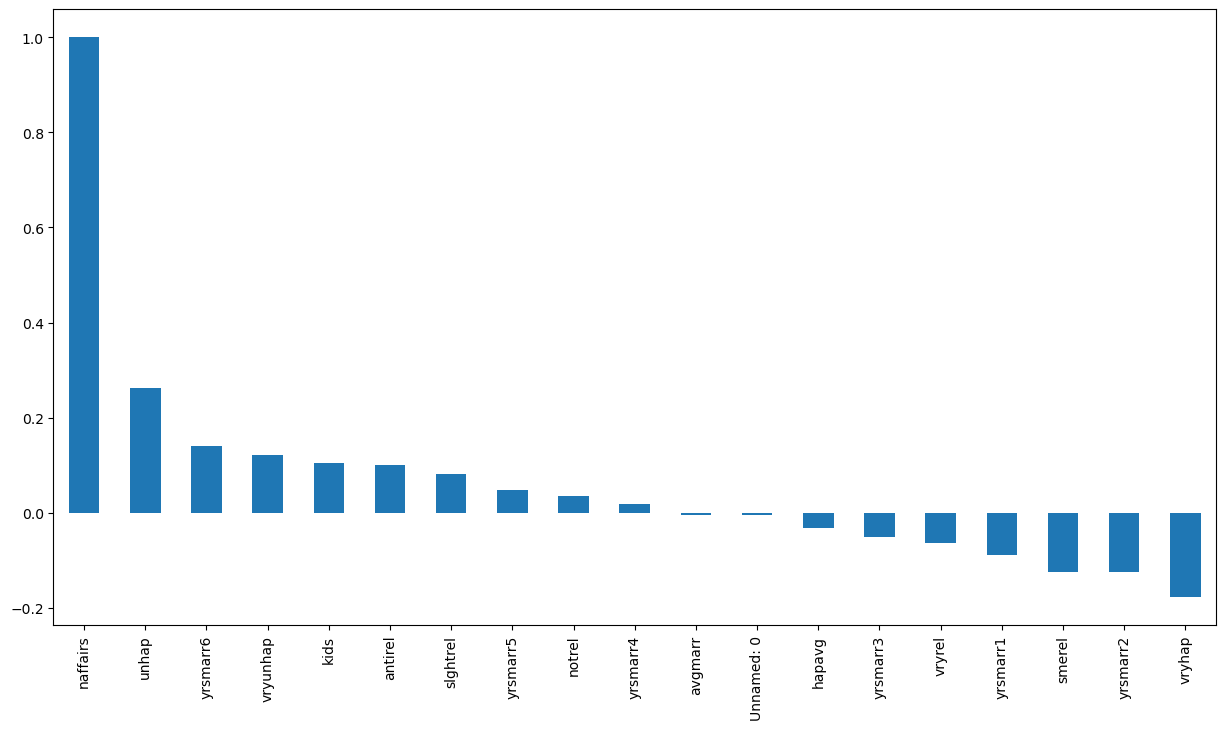

In [41]:
# Get Correlation of "Churn" with other variables
plt.figure(figsize=(15,8))
df_dummies.corr()['naffairs'].sort_values(ascending = False).plot(kind='bar')

In [43]:
married = df_dummies.corr()
married

,Unnamed: 0,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
Unnamed: 0,1.000000,-0.003495,0.041301,-0.003873,0.033557,0.007558,-0.049558,0.021709,-0.005271,0.031564,0.014506,0.010540,-0.073217,-0.063008,-0.019613,0.007173,0.091671,-0.034530,0.003241
naffairs,-0.003495,1.000000,0.104010,0.121380,0.263033,-0.003349,-0.030714,-0.177079,0.100776,0.036528,0.082611,-0.123361,-0.062811,-0.087461,-0.124402,-0.051676,0.018554,0.047346,0.140721
kids,0.041301,0.104010,1.000000,0.035564,0.127133,0.025094,0.119876,-0.227176,-0.045474,-0.110424,0.015304,0.071857,0.068019,-0.369977,-0.427288,-0.059484,0.132481,0.148491,0.389742
vryunhap,-0.003873,0.121380,0.035564,1.000000,-0.058087,-0.070761,-0.114179,-0.131133,-0.010595,0.014710,0.014242,-0.023525,0.004396,-0.050898,-0.068496,-0.021650,-0.005511,-0.060046,0.143393
unhap,0.033557,0.263033,0.127133,-0.058087,1.000000,-0.150281,-0.242493,-0.278500,-0.044586,0.071563,0.023767,-0.044239,-0.027989,-0.089167,-0.025047,-0.091528,0.108448,-0.044579,0.096623
avgmarr,0.007558,-0.003349,0.025094,-0.070761,-0.150281,1.000000,-0.295402,-0.339266,-0.041200,-0.003901,0.022840,0.005927,0.002410,0.015602,-0.047075,-0.015120,0.004170,0.002410,0.033352
hapavg,-0.049558,-0.030714,0.119876,-0.114179,-0.242493,-0.295402,1.000000,-0.547437,0.019768,-0.015487,-0.005553,0.020427,-0.017702,-0.022600,-0.124884,0.010370,-0.015233,0.071048,0.061251
vryhap,0.021709,-0.177079,-0.227176,-0.131133,-0.278500,-0.339266,-0.547437,1.000000,0.043760,-0.033053,-0.031608,0.012169,0.031732,0.084210,0.193641,0.067214,-0.056296,-0.021539,-0.193068
antirel,-0.005271,0.100776,-0.045474,-0.010595,-0.044586,-0.041200,0.019768,0.043760,1.000000,-0.180484,-0.154022,-0.200315,-0.106969,-0.003342,-0.000491,0.123074,-0.027700,-0.030435,-0.055645
notrel,0.031564,0.036528,-0.110424,0.014710,0.071563,-0.003901,-0.015487,-0.033053,-0.180484,1.000000,-0.320262,-0.416521,-0.222425,0.063914,0.126652,-0.016254,0.017672,0.022107,-0.147259


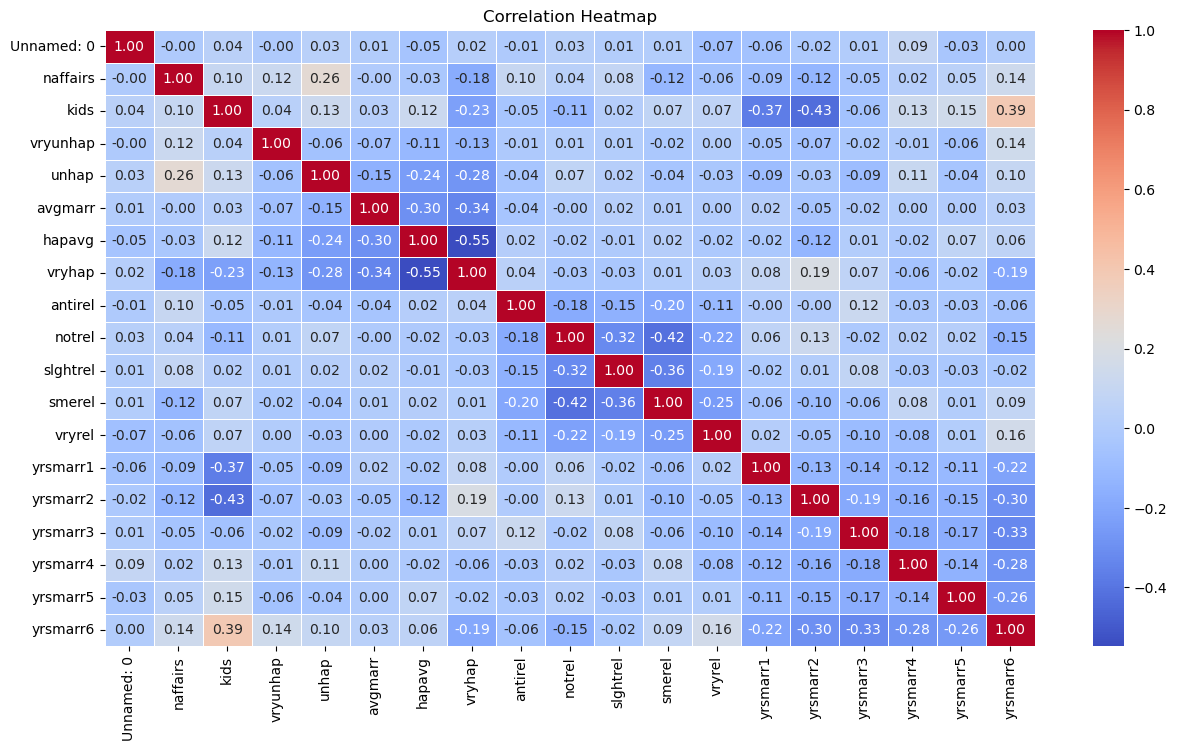

In [45]:
### It shows the heatmap correlation

plt.figure(figsize=(15, 8))
corr_matrix = df_dummies.corr()

# Plotting the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

# Relationship between yrsmarr1 and yrsmarr6

<Axes: xlabel='yrsmarr1', ylabel='yrsmarr6'>

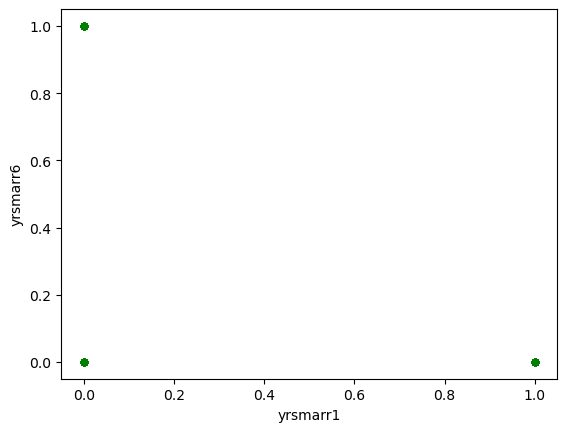

In [62]:
affairor_not[['yrsmarr1', 'yrsmarr6']].plot.scatter(x = 'yrsmarr1',y='yrsmarr6', color = 'green')

# Relationship between naffairs an others

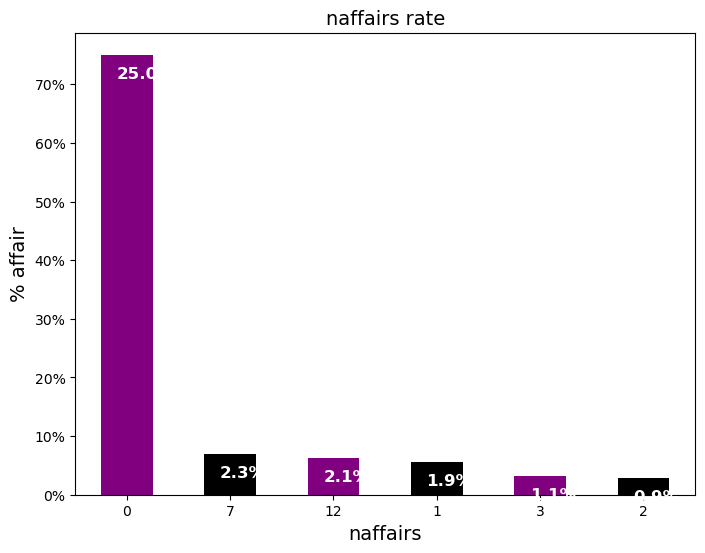

In [124]:
colors = ['purple', 'black']
ax = (affairor_not['naffairs'].value_counts() * 100.0 / len(affairor_not)).plot(
    kind='bar',
    stacked=True,
    rot=0,
    color=colors,
    figsize=(8, 6)
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% affair', size=14)
ax.set_xlabel('naffairs', size=14)
ax.set_title('naffairs rate', size=14)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to the list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar labels using the above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x() + 0.15, i.get_height() - 4.0,
            str(round((i.get_height() / total), 1)) + '%',
            fontsize=12,
            color='white',
            weight='bold')

<Axes: xlabel='naffairs', ylabel='vryhap'>

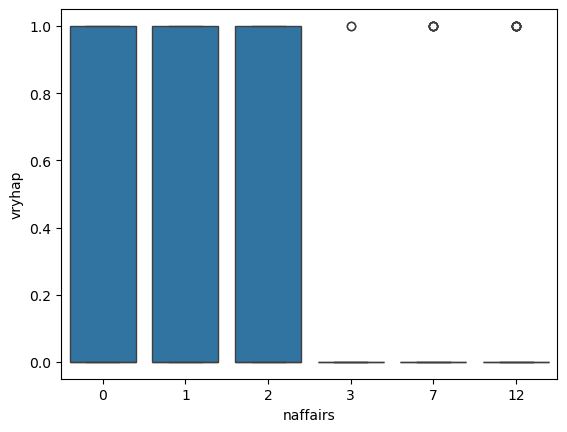

In [70]:
sns.boxplot(x = affairor_not.naffairs, y = affairor_not.vryhap)

# lets apply Logistic regression

In [73]:
# We will use the data frame where we had created dummy variables

y = df_dummies['naffairs'].values
X = df_dummies.drop(columns = ['naffairs'])

# Scaling all the variables to a range of 0 to 1

from sklearn.preprocessing import MinMaxScaler

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [75]:
y

array([ 0,  0,  3,  0,  3,  0,  0,  0,  7,  0,  0,  0,  0,  0, 12,  0,  0,
        1,  1,  0,  0,  0,  0,  0,  0,  0, 12,  0,  7,  0,  0,  2,  0,  0,
        3,  0,  0,  0,  0,  1,  0,  7,  0,  0,  0,  0,  0,  0, 12, 12, 12,
        3,  0,  7,  0,  7,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  7,  1,
        0,  0,  0,  0, 12, 12,  0,  0,  0,  0,  0,  3,  7,  0,  1,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  3,  0,  3,  0,  1,  1,  0,  0,  0,
        0,  7,  7,  0,  0,  0,  0,  0,  0,  0,  7, 12,  0,  0,  0,  0,  0,
        0,  0,  0,  7,  7,  0,  1,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
        0,  0,  0,  0,  0,  0,  0, 12,  0, 12,  0,  1, 12, 12,  7,  0,  0,
        0,  0,  0,  0,  0,  0,  7,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  3,  0,  0,  0, 12,  0,  0,  0,  0,  7,  0,  0,  1,  0,  0,  0,
        0,  7,  1,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  7,  0,  0,
        7,  0,  0,  0,  0

In [79]:
X

,Unnamed: 0,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.001667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.003333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.005000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.006667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0.993333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
597,0.995000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
598,0.996667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
599,0.998333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [85]:
#create train and test data 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [87]:
# apply model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [89]:
from sklearn import metrics
prediction_test = model.predict(X_test)

# Print the prediction accuracy

print (metrics.accuracy_score(y_test, prediction_test))

0.7182320441988951


Axes(0.125,0.11;0.775x0.77)


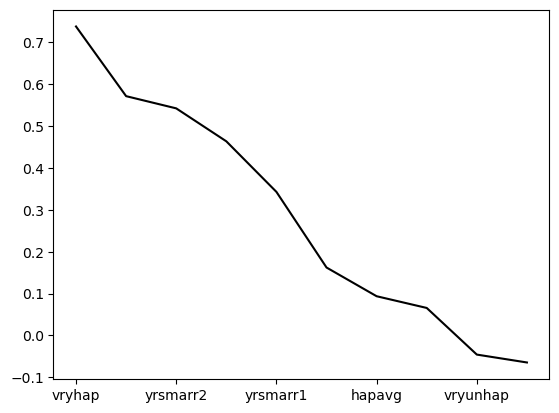

In [111]:
# To get the weights of all the variables

weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='line', color = 'black'))

Axes(0.125,0.11;0.775x0.77)


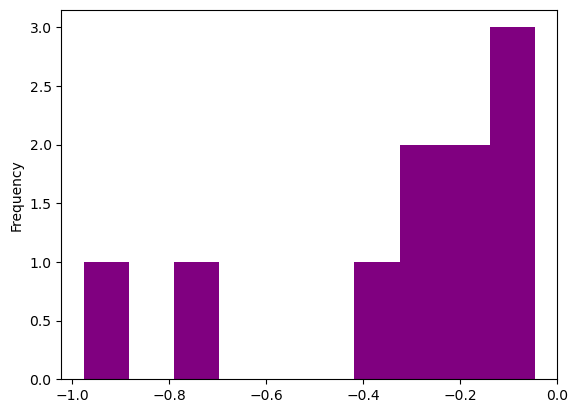

In [113]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='hist', color = 'purple'))